In [1]:
# Import all Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime, timedelta
import numpy as np

In [28]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

In [2]:
exchange_rate = pd.read_excel('NG Exchange rates.xlsx')
inflation_rate = pd.read_excel('NG Export Inflation Rates.xlsx')
money_supply = pd.read_excel('NG M1 Money Supply.xlsx')
market_index = pd.read_excel('NG Stock Market Index.xlsx')

In [3]:
# Display the first few rows of each dataframe to understand their structure
inflation_rate.head(), money_supply.head(), market_index.head(), exchange_rate.head()

(   Year  Month  All Items (Year on Change)  All Items (12 Months Avg. Change)  \
 0  2014      1                         8.0                                8.4   
 1  2014      2                         7.7                                8.3   
 2  2014      3                         7.8                                8.2   
 3  2014      4                         7.9                                8.1   
 4  2014      5                         8.0                                8.0   
 
    Food (Year on Change)/1  Food (12 Months Avg. Change)/1  \
 0                      9.3                             9.6   
 1                      9.2                             9.5   
 2                      9.3                             9.5   
 3                      9.4                             9.4   
 4                      9.7                             9.4   
 
    All Items Less Farm Produce (Year on Change)/2  \
 0                                             6.6   
 1                

In [4]:
# Display the first few rows of each dataframe to understand their structure
inflation_rate.info(), money_supply.info(), market_index.info(), exchange_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 10 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Year                                                              126 non-null    int64  
 1   Month                                                             126 non-null    int64  
 2   All Items (Year on Change)                                        126 non-null    float64
 3   All Items (12 Months Avg. Change)                                 126 non-null    float64
 4   Food (Year on Change)/1                                           126 non-null    float64
 5   Food (12 Months Avg. Change)/1                                    126 non-null    float64
 6   All Items Less Farm Produce (Year on Change)/2                    126 non-null    float64
 7   All Items Less Farm Produce (12 Mon

(None, None, None, None)

In [5]:
exchange_rate['Rate Date'] = pd.to_datetime(exchange_rate['Rate Date'])
exchange_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30139 entries, 0 to 30138
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rate Date     30139 non-null  datetime64[ns]
 1   Currency      30139 non-null  object        
 2   Rate Year     30139 non-null  int64         
 3   Rate Month    30139 non-null  object        
 4   Buying Rate   30139 non-null  float64       
 5   Central Rate  30139 non-null  float64       
 6   Selling Rate  30139 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 1.6+ MB


In [6]:
exchange_rate['Month'] = exchange_rate['Rate Date'].dt.month
exchange_rate.head()

,Rate Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate,Month
0,2024-07-22,US DOLLAR,2024,July,1533.5590,1534.0590,1534.5590,7
1,2024-07-22,POUNDS STERLING,2024,July,1981.0515,1981.6974,1982.3433,7
2,2024-07-22,EURO,2024,July,1668.8189,1669.3630,1669.9071,7
3,2024-07-22,SWISS FRANC,2024,July,1724.2624,1724.8246,1725.3868,7
4,2024-07-22,YEN,2024,July,9.7810,9.7842,9.7874,7


In [7]:
market_index['Year'] = market_index['Date'].dt.year
market_index['Month'] = market_index['Date'].dt.month
market_index.head()

,Date,Price,Open,High,Low,Vol.,Change %,Year,Month
0,2024-07-22,100568.60,100539.40,100586.42,100506.84,335.68M,0.0003,2024,7
1,2024-07-19,100539.40,100503.21,100539.79,100315.93,603.87M,0.0004,2024,7
2,2024-07-18,100503.21,100031.36,100612.86,99830.80,392.73M,0.0047,2024,7
3,2024-07-17,100032.32,100075.59,100277.80,99955.79,1.10B,-0.0004,2024,7
4,2024-07-16,100075.59,99938.56,100077.30,99891.74,368.36M,0.0010,2024,7


In [8]:
inflation_rate.head()

,Year,Month,All Items (Year on Change),All Items (12 Months Avg. Change),Food (Year on Change)/1,Food (12 Months Avg. Change)/1,All Items Less Farm Produce (Year on Change)/2,All Items Less Farm Produce (12 Months Avg. Change)/2,All Items Less Farm Produce and Energy (Year on Change)/3,All Items Less Farm Produce and Energy (12 Months Avg. Change)/3
0,2014,1,8.0,8.4,9.3,9.6,6.6,7.3,7.4,6.7
1,2014,2,7.7,8.3,9.2,9.5,7.2,7.0,8.0,6.6
2,2014,3,7.8,8.2,9.3,9.5,6.8,7.0,6.7,6.7
3,2014,4,7.9,8.1,9.4,9.4,7.5,7.0,7.6,6.9
4,2014,5,8.0,8.0,9.7,9.4,7.7,7.2,8.6,7.2


In [9]:
money_supply.head()

,Year,Month,Narrow Money (M1)
0,2024,1,3.155588e+13
1,2024,2,3.027725e+13
2,2024,3,3.248991e+13
3,2024,4,3.381899e+13
4,2024,5,3.338263e+13


In [10]:
# Data preprocessing (example: selecting relevant columns and handling data types)
market_index['Date'] = pd.to_datetime(market_index['Date'])
exchange_rate['Rate Date'] = pd.to_datetime(exchange_rate['Rate Date'])
inflation_rate['Year'] = pd.to_numeric(inflation_rate['Year'])
money_supply['Year'] = pd.to_numeric(money_supply['Year'])
money_supply['Month'] = pd.to_numeric(money_supply['Month'])

In [11]:
exchange_rate[exchange_rate['Currency'] == 'US DOLLAR']

,Rate Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate,Month
0,2024-07-22,US DOLLAR,2024,July,1533.559,1534.059,1534.559,7
12,2024-07-19,US DOLLAR,2024,July,1584.000,1584.500,1585.000,7
24,2024-07-17,US DOLLAR,2024,July,1583.739,1584.239,1584.739,7
35,2024-07-16,US DOLLAR,2024,July,1572.492,1572.992,1573.492,7
47,2024-07-15,US DOLLAR,2024,July,1565.392,1565.892,1566.392,7
...,...,...,...,...,...,...,...,...
30084,2014-08-01,US DOLLAR,2014,January,154.720,155.220,155.720,8
30095,2014-07-01,US DOLLAR,2014,January,154.720,155.220,155.720,7
30106,2014-06-01,US DOLLAR,2014,January,154.720,155.220,155.720,6
30117,2014-03-01,US DOLLAR,2014,January,154.700,155.200,155.700,3


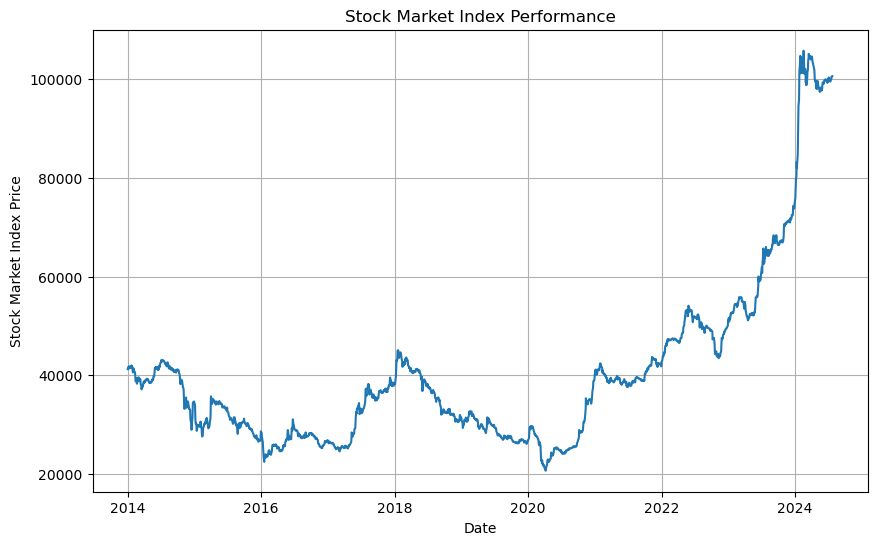

In [12]:

# Step 2: Visual Analysis - Creating Charts

# Line chart for Stock Market Index over time
plt.figure(figsize=(10, 6))
plt.plot(market_index['Date'], market_index['Price'])
plt.xlabel('Date')
plt.ylabel('Stock Market Index Price')
plt.title('Stock Market Index Performance')
plt.grid(True)
plt.show()

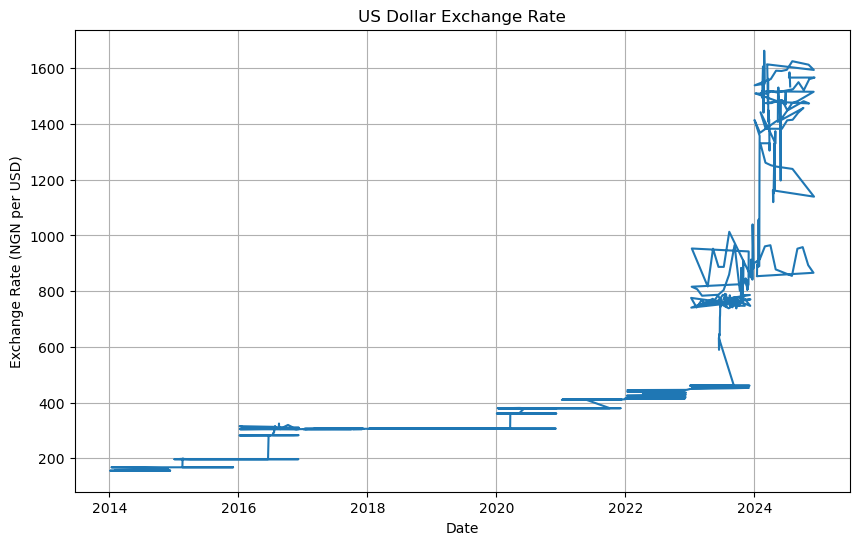

In [13]:
# Line chart for Exchange Rate (USD) over time
exchange_rate_usd = exchange_rate[exchange_rate['Currency'] == 'US DOLLAR']
plt.figure(figsize=(10, 6))
plt.plot(exchange_rate_usd['Rate Date'], exchange_rate_usd['Selling Rate'])
plt.xlabel('Date')
plt.ylabel('Exchange Rate (NGN per USD)')
plt.title('US Dollar Exchange Rate')
plt.grid(True)
plt.show()


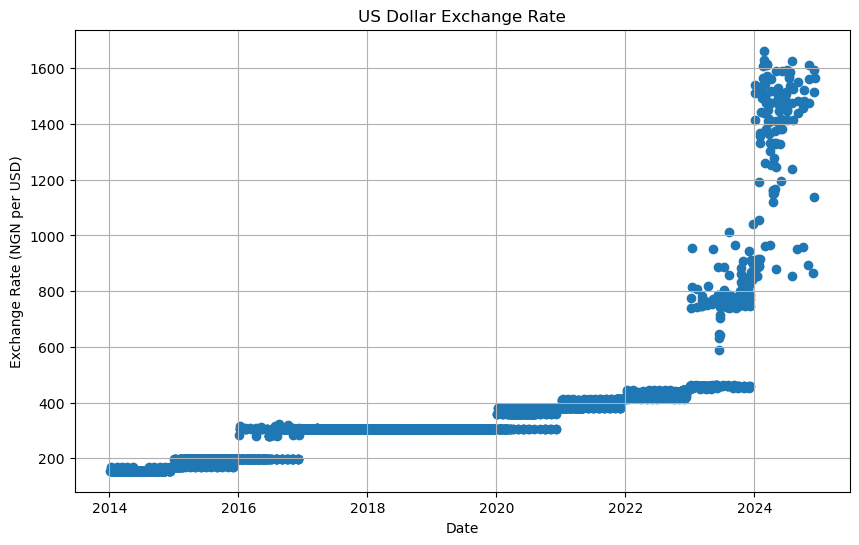

In [16]:
# Filter the data for US Dollar
exchange_rate_usd = exchange_rate[exchange_rate['Currency'] == 'US DOLLAR']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(exchange_rate_usd['Rate Date'], exchange_rate_usd['Selling Rate'])
plt.xlabel('Date')
plt.ylabel('Exchange Rate (NGN per USD)')
plt.title('US Dollar Exchange Rate')
plt.grid(True)
plt.show()


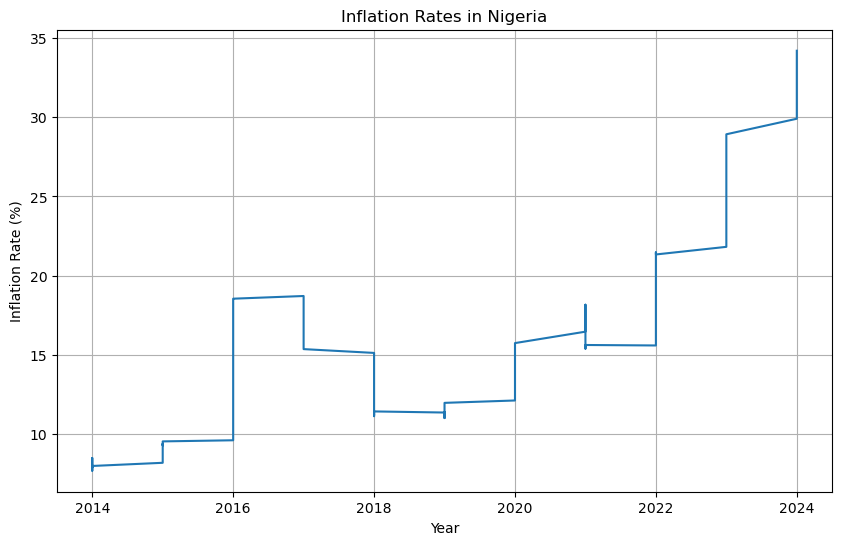

In [14]:

# Line chart for Inflation Rates over time
plt.figure(figsize=(10, 6))
plt.plot(inflation_rate['Year'], inflation_rate['All Items (Year on Change)'])
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.title('Inflation Rates in Nigeria')
plt.grid(True)
plt.show()

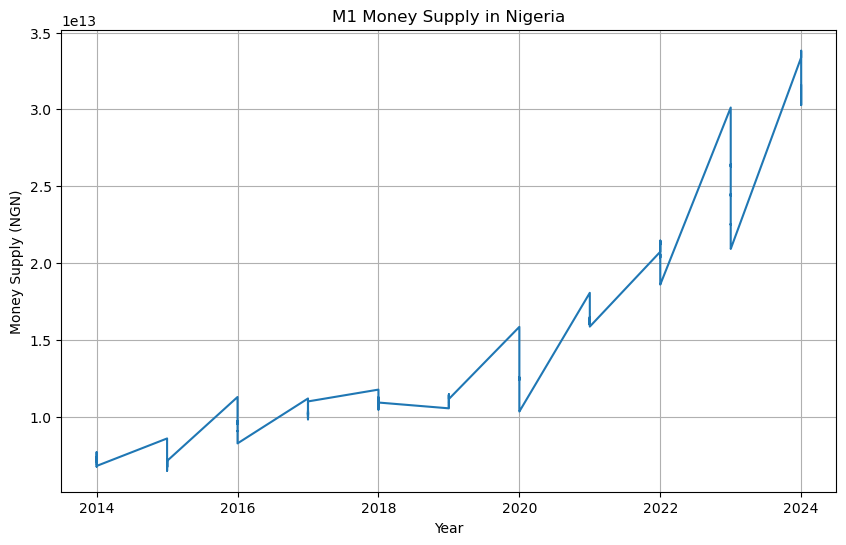

In [15]:
# Line chart for M1 Money Supply over time
plt.figure(figsize=(10, 6))
plt.plot(money_supply['Year'], money_supply['Narrow Money (M1)'])
plt.xlabel('Year')
plt.ylabel('Money Supply (NGN)')
plt.title('M1 Money Supply in Nigeria')
plt.grid(True)
plt.show()

In [20]:
# Step 3: Statistical Analysis - Checking for Relationships

# Convert 'Year' and 'Month' columns to datetime for inflation and money supply data
inflation_rate['Year_Month'] = pd.to_datetime(inflation_rate['Year'].astype(str) + inflation_rate['Month'].astype(str).str.zfill(2), format='%Y%m')
money_supply['Year_Month'] = pd.to_datetime(money_supply['Year'].astype(str) + money_supply['Month'].astype(str).str.zfill(2), format='%Y%m')


In [21]:
inflation_rate

,Year,Month,All Items (Year on Change),All Items (12 Months Avg. Change),Food (Year on Change)/1,Food (12 Months Avg. Change)/1,All Items Less Farm Produce (Year on Change)/2,All Items Less Farm Produce (12 Months Avg. Change)/2,All Items Less Farm Produce and Energy (Year on Change)/3,All Items Less Farm Produce and Energy (12 Months Avg. Change)/3,Year_Month
0,2014,1,8.00,8.40,9.30,9.60,6.60,7.30,7.40,6.70,2014-01-01
1,2014,2,7.70,8.30,9.20,9.50,7.20,7.00,8.00,6.60,2014-02-01
2,2014,3,7.80,8.20,9.30,9.50,6.80,7.00,6.70,6.70,2014-03-01
3,2014,4,7.90,8.10,9.40,9.40,7.50,7.00,7.60,6.90,2014-04-01
4,2014,5,8.00,8.00,9.70,9.40,7.70,7.20,8.60,7.20,2014-05-01
...,...,...,...,...,...,...,...,...,...,...,...
121,2024,2,31.70,26.18,37.92,30.07,24.67,21.84,25.13,21.72,2024-02-01
122,2024,3,33.20,27.13,40.01,31.40,25.39,22.31,25.90,22.26,2024-03-01
123,2024,4,33.69,28.10,40.53,32.74,26.18,22.82,26.84,22.84,2024-04-01
124,2024,5,33.95,29.06,40.66,34.06,26.36,23.35,27.04,23.45,2024-05-01


In [24]:
#Drop columns not needed from our inflation dataset
inflation_rate.drop(['All Items (12 Months Avg. Change)','Food (Year on Change)/1','Food (12 Months Avg. Change)/1','All Items Less Farm Produce (Year on Change)/2','All Items Less Farm Produce (12 Months Avg. Change)/2','All Items Less Farm Produce and Energy (Year on Change)/3','All Items Less Farm Produce and Energy (12 Months Avg. Change)/3'], axis=1, inplace=True)

In [25]:
inflation_rate

,Year,Month,All Items (Year on Change),Year_Month
0,2014,1,8.00,2014-01-01
1,2014,2,7.70,2014-02-01
2,2014,3,7.80,2014-03-01
3,2014,4,7.90,2014-04-01
4,2014,5,8.00,2014-05-01
...,...,...,...,...
121,2024,2,31.70,2024-02-01
122,2024,3,33.20,2024-03-01
123,2024,4,33.69,2024-04-01
124,2024,5,33.95,2024-05-01


In [22]:
money_supply

,Year,Month,Narrow Money (M1),Year_Month
0,2024,1,3.155588e+13,2024-01-01
1,2024,2,3.027725e+13,2024-02-01
2,2024,3,3.248991e+13,2024-03-01
3,2024,4,3.381899e+13,2024-04-01
4,2024,5,3.338263e+13,2024-05-01
...,...,...,...,...
120,2014,8,7.060020e+12,2014-08-01
121,2014,9,7.352577e+12,2014-09-01
122,2014,10,7.261036e+12,2014-10-01
123,2014,11,7.084121e+12,2014-11-01


In [26]:
# Merge inflation and money supply data on 'Year_Month'
merged_data = pd.merge(inflation_rate, money_supply, on='Year_Month')
merged_data

,Year_x,Month_x,All Items (Year on Change),Year_Month,Year_y,Month_y,Narrow Money (M1)
0,2014,1,8.00,2014-01-01,2014,1,6.782016e+12
1,2014,2,7.70,2014-02-01,2014,2,6.739404e+12
2,2014,3,7.80,2014-03-01,2014,3,7.617910e+12
3,2014,4,7.90,2014-04-01,2014,4,7.677108e+12
4,2014,5,8.00,2014-05-01,2014,5,7.348681e+12
...,...,...,...,...,...,...,...
120,2024,1,29.90,2024-01-01,2024,1,3.155588e+13
121,2024,2,31.70,2024-02-01,2024,2,3.027725e+13
122,2024,3,33.20,2024-03-01,2024,3,3.248991e+13
123,2024,4,33.69,2024-04-01,2024,4,3.381899e+13


In [29]:
# Add a constant for the intercept term
merged_data = add_constant(merged_data)
merged_data

,const,Year_x,Month_x,All Items (Year on Change),Year_Month,Year_y,Month_y,Narrow Money (M1)
0,1.0,2014,1,8.00,2014-01-01,2014,1,6.782016e+12
1,1.0,2014,2,7.70,2014-02-01,2014,2,6.739404e+12
2,1.0,2014,3,7.80,2014-03-01,2014,3,7.617910e+12
3,1.0,2014,4,7.90,2014-04-01,2014,4,7.677108e+12
4,1.0,2014,5,8.00,2014-05-01,2014,5,7.348681e+12
...,...,...,...,...,...,...,...,...
120,1.0,2024,1,29.90,2024-01-01,2024,1,3.155588e+13
121,1.0,2024,2,31.70,2024-02-01,2024,2,3.027725e+13
122,1.0,2024,3,33.20,2024-03-01,2024,3,3.248991e+13
123,1.0,2024,4,33.69,2024-04-01,2024,4,3.381899e+13


In [30]:
# OLS Regression: Inflation Rates vs Money Supply
model = OLS(merged_data['All Items (Year on Change)'], merged_data[['const', 'Narrow Money (M1)']])
results = model.fit()

# Print the regression summary
print(results.summary())

                                OLS Regression Results                                
Dep. Variable:     All Items (Year on Change)   R-squared:                       0.836
Model:                                    OLS   Adj. R-squared:                  0.835
Method:                         Least Squares   F-statistic:                     628.1
Date:                        Wed, 24 Jul 2024   Prob (F-statistic):           3.70e-50
Time:                                13:31:33   Log-Likelihood:                -287.82
No. Observations:                         125   AIC:                             579.6
Df Residuals:                             123   BIC:                             585.3
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [ ]:
# Merge exchange rate and stock market index on Date
